In [1]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import random
from scipy.stats import randint, uniform, loguniform
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform, loguniform
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [2]:
random.seed(1)

data_dir = './GSE61260/'

In [3]:
df = pd.read_csv(os.path.join(data_dir, 'combined.csv'))

df.head()

,Sample_ID,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,...,ENSG00000283907,ENSG00000283913,ENSG00000284032,ENSG00000284373,ENSG00000284387,ENSG00000284395,ENSG00000284505,ENSG00000284552,Disease,characteristics_ch1_bmi
0,GSM1501013,8.002176,0.175238,4.949994,3.285351,0.959516,0.672894,59.325067,4.168056,8.104327,...,3.031789,0.903138,1.222211,0.132392,0.491394,-0.079424,-0.255411,3.071849,normal control,27.1
1,GSM1501014,23.292853,-0.031148,5.657237,2.786927,1.203578,0.358625,46.002714,4.889903,7.588060,...,1.819534,-0.021741,0.487849,-0.066907,0.195198,0.178077,-0.190626,1.399320,healthy obese,30.5
2,GSM1501015,10.557890,0.097413,7.680354,2.795125,0.789783,0.733455,43.835288,5.133417,9.559194,...,1.914932,0.424076,0.423539,-0.155705,0.086307,0.230390,-0.489850,1.632879,normal control,25.3
3,GSM1501016,10.272135,0.066298,8.835539,3.166677,0.941032,0.755181,51.390227,4.168056,10.980774,...,1.313128,0.501803,0.357365,-0.321937,0.232894,-0.066718,-0.233382,2.117271,normal control,25.8
4,GSM1501017,8.290414,-0.039647,5.792685,2.203175,0.846344,0.612263,55.423440,3.657327,10.710821,...,4.507792,0.120017,0.452607,-0.263615,0.443599,0.291308,-0.474034,3.032463,normal control,23.5


In [4]:
le = LabelEncoder()

y = le.fit_transform(df['Disease'])

print(le.classes_)

X = df.drop(columns = ['Sample_ID', 'Disease'])

['healthy obese' 'nafld' 'nash' 'normal control' 'pbc' 'psc']


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

print(X_train.shape)
print(X_test.shape)

(106, 21662)
(27, 21662)


In [6]:
pipeline_steps = [
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('classifier', XGBClassifier(random_state=42, device='cuda', enable_categorical=False))
]
pipeline = ImbPipeline(pipeline_steps)
print("\nDefined Pipeline:")
print(pipeline)




Defined Pipeline:
Pipeline(steps=[('scaler', StandardScaler()), ('smote', SMOTE(random_state=42)),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device='cuda',
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               mi


Starting RandomizedSearchCV on Pipeline...
Fitting 5 folds for each of 1 candidates, totalling 5 fits


c:\Users\jaydn\Documents\Projects\Human-Liver-RNA-Seq-Gene-Expression-Analysis\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:32:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


RandomizedSearchCV on Pipeline complete.

Best hyperparameters found for the pipeline:
{'classifier__class_weight': None, 'classifier__colsample_bytree': np.float64(0.8982714934301164), 'classifier__eval_metric': 'mlogloss', 'classifier__gamma': np.float64(2.934123021513229e-08), 'classifier__learning_rate': np.float64(0.03625617634576228), 'classifier__max_depth': 1, 'classifier__min_child_weight': 3, 'classifier__n_estimators': 221, 'classifier__objective': 'multi:softmax', 'classifier__reg_alpha': np.float64(1.7699302940633323e-08), 'classifier__reg_lambda': np.float64(2.9152036385288267e-09), 'classifier__subsample': np.float64(0.9464704583099741), 'classifier__use_label_encoder': False}

Best cross-validation score:
0.5674721574721575

Best Pipeline Model:
Pipeline(steps=[('scaler', StandardScaler()), ('smote', SMOTE(random_state=42)),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               class_w

c:\Users\jaydn\Documents\Projects\Human-Liver-RNA-Seq-Gene-Expression-Analysis\venv\Lib\site-packages\xgboost\core.py:729: UserWarning: [12:32:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)


<Axes: >

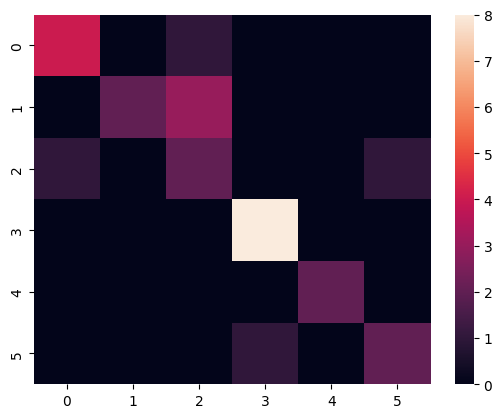

In [7]:

param_dist = {
    'classifier__n_estimators': randint(100, 500),
    'classifier__learning_rate': loguniform(0.001, 0.1),
    'classifier__max_depth': randint(1, 4),
    
    'classifier__colsample_bytree': uniform(0.5, 0.5), 
    
    'classifier__subsample': uniform(0.6, 0.4),
    'classifier__gamma': loguniform(1e-9, 1e-1),
    'classifier__min_child_weight': randint(1, 5),
    'classifier__reg_alpha': loguniform(1e-9, 1e-1),
    'classifier__reg_lambda': loguniform(1e-9, 1e-1),

    'classifier__objective': ['multi:softmax'],
    'classifier__eval_metric': ['mlogloss'],
    'classifier__use_label_encoder': [False],
    'classifier__class_weight': [None, 'balanced']
}

# Initialize RandomizedSearchCV
random_search_pipeline = RandomizedSearchCV(
    estimator=pipeline,                
    param_distributions=param_dist,  
    n_iter=1,                   
    cv=5,                         
    scoring='f1_weighted',         
    verbose=1,                         
    random_state=42,                   
    n_jobs=6                          
)

print("\nStarting RandomizedSearchCV on Pipeline...")
random_search_pipeline.fit(X_train, y_train)
print("RandomizedSearchCV on Pipeline complete.")

print("\nBest hyperparameters found for the pipeline:")
print(random_search_pipeline.best_params_)

print("\nBest cross-validation score:")
print(random_search_pipeline.best_score_)

best_pipeline_model = random_search_pipeline.best_estimator_
print("\nBest Pipeline Model:")
print(best_pipeline_model)

y_pred_tuned = best_pipeline_model.predict(X_test)

print("\n--- Evaluation of Best Tuned Pipeline on Test Set ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_tuned):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_tuned, target_names=le.classes_))


best_scaler = best_pipeline_model.named_steps['scaler']
best_classifier = best_pipeline_model.named_steps['classifier']

conf_matrix = confusion_matrix(y_test, y_pred_tuned)
print("\nConfusion Matrix:")
sns.heatmap(conf_matrix)



--- Top 20 Most Relevant Features ---
               feature  importance
7311   ENSG00000138071    0.033547
11792  ENSG00000168175    0.031994
6651   ENSG00000134470    0.030838
7812   ENSG00000141448    0.030715
3998   ENSG00000113119    0.026560
9906   ENSG00000159202    0.025262
3875   ENSG00000112183    0.025002
8057   ENSG00000143341    0.024399
754    ENSG00000057593    0.021160
11858  ENSG00000168484    0.018465
10690  ENSG00000163814    0.016615
13468  ENSG00000176624    0.016079
7405   ENSG00000138617    0.015662
17593  ENSG00000203875    0.015373
3404   ENSG00000108389    0.014823
7356   ENSG00000138315    0.014730
18988  ENSG00000222259    0.014337
16853  ENSG00000199482    0.013733
3187   ENSG00000106355    0.013562
12470  ENSG00000171320    0.013374


<Axes: xlabel='importance', ylabel='feature'>

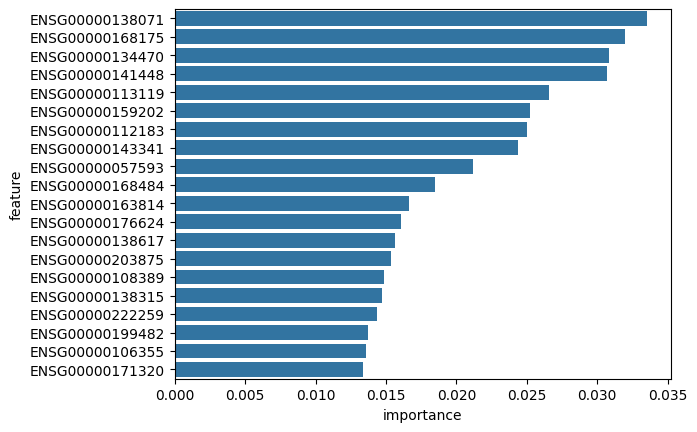

In [8]:
best_classifier = best_pipeline_model.named_steps['classifier']
importances = best_classifier.feature_importances_

feature_names = X_train.columns.tolist()

feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
})

feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

print("\n--- Top 20 Most Relevant Features ---")
print(feature_importance_df.head(20))

sns.barplot(x='importance', y='feature', data=feature_importance_df.head(20))